In [1]:
!python -V

Python 3.10.16


In [2]:
import pandas as pd

In [3]:
import pickle

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import root_mean_squared_error

In [65]:
df = pd.read_parquet('./data/yellow_tripdata_2023-01.parquet')

# df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
# df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

# df = df[(df.duration >= 1) & (df.duration <= 60)]

# categorical = ['PULocationID', 'DOLocationID']
# numerical = ['trip_distance']

# df[categorical] = df[categorical].astype(str)

In [66]:
df.shape


(3066766, 19)

In [68]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [69]:
df.tpep_dropoff_datetime  = pd.to_datetime(df.tpep_dropoff_datetime)
df.tpep_pickup_datetime   = pd.to_datetime(df.tpep_pickup_datetime)

In [73]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [74]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)


In [77]:
df['duration'].std()

42.594351241920904

<Axes: >

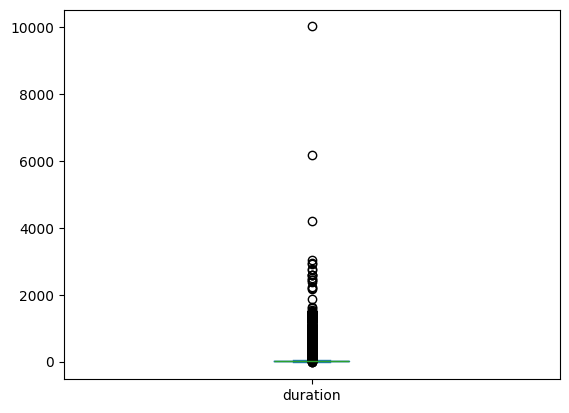

In [79]:
df['duration'].plot(kind='box')

<Axes: >

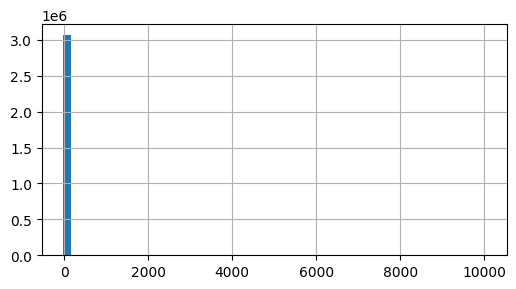

In [86]:
plt.figure(figsize=(6,3))
df['duration'].hist(bins=50)

In [87]:
# Calculate quartiles and IQR
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
print('Interquantile range', IQR)
# Calculate outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

Interquantile range 11.183333333333334
-9.658333333333331 35.075


In [88]:
df['duration'].min(), df['duration'].max()

(-29.2, 10029.183333333332)

In [89]:
df2 = df[(df.duration >= 1) & (df.duration <= 60)]

<Axes: >

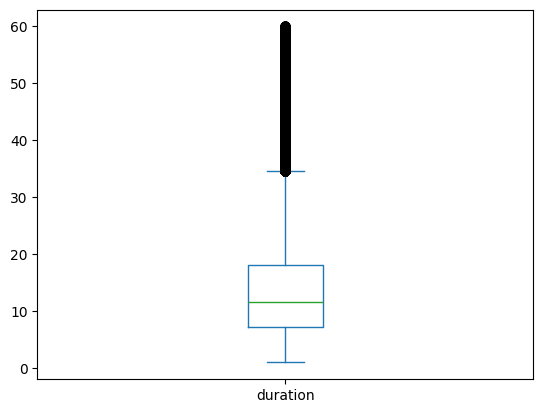

In [90]:
df2['duration'].plot(kind='box')

In [91]:
# Calculate quartiles and IQR
Q1 = df2['duration'].quantile(0.25)
Q3 = df2['duration'].quantile(0.75)
IQR = Q3 - Q1
print('Interquantile range', IQR)
# Calculate outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

Interquantile range 10.966666666666667
-9.233333333333333 34.63333333333333


In [92]:
100*df2.shape[0]/df.shape[0]

98.1220282212598

In [93]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df2[categorical] = df2[categorical].astype(str)

C:\Users\Luis\AppData\Local\Temp\ipykernel_34792\3562174876.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[categorical] = df2[categorical].astype(str)


In [95]:
df2['PULocationID'].value_counts()

PULocationID
237    147082
132    144529
236    137402
161    134047
186    108346
        ...  
30          2
58          2
109         1
221         1
245         1
Name: count, Length: 255, dtype: int64

In [96]:
df2['DOLocationID'].value_counts()

DOLocationID
236    145424
237    131472
161    114979
170     87998
230     87755
        ...  
109        16
187        14
84         10
204         8
99          1
Name: count, Length: 260, dtype: int64

In [101]:
train_dicts = df2[categorical].to_dict(orient='records')
train_dicts[:5]

[{'PULocationID': '161', 'DOLocationID': '141'},
 {'PULocationID': '43', 'DOLocationID': '237'},
 {'PULocationID': '48', 'DOLocationID': '238'},
 {'PULocationID': '138', 'DOLocationID': '7'},
 {'PULocationID': '107', 'DOLocationID': '79'}]

In [102]:
dv = DictVectorizer()


In [103]:
dv

DictVectorizer()

In [104]:
X_train = dv.fit_transform(train_dicts)
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6018346 stored elements and shape (3009173, 515)>

In [105]:
target = 'duration'
y_train = df2[target].values

In [106]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [107]:
y_pred = lr.predict(X_train)


In [108]:
root_mean_squared_error(y_train, y_pred)

7.649261927011587

C:\Users\Luis\AppData\Local\Temp\ipykernel_34792\1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
C:\Users\Luis\AppData\Local\Temp\ipykernel_34792\1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


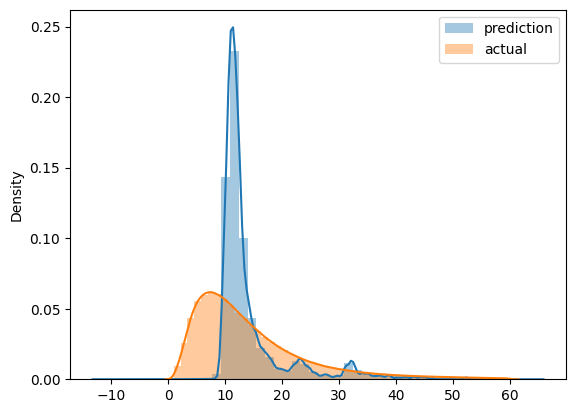

In [109]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [110]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    print(df.duration.describe())

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    print(df.duration.describe())

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [113]:
df_train = read_dataframe('./data/yellow_tripdata_2023-01.parquet')
df_val = read_dataframe('./data/yellow_tripdata_2023-02.parquet')

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64
count    3.009173e+06
mean     1.420486e+01
std      9.939386e+00
min      1.000000e+00
25%      7.216667e+00
50%      1.155000e+01
75%      1.818333e+01
max      6.000000e+01
Name: duration, dtype: float64
count    2.913955e+06
mean     1.601591e+01
std      4.284210e+01
min     -4.361667e+01
25%      7.250000e+00
50%      1.180000e+01
75%      1.876667e+01
max      7.053617e+03
Name: duration, dtype: float64
count    2.855951e+06
mean     1.446811e+01
std      1.006423e+01
min      1.000000e+00
25%      7.366667e+00
50%      1.181667e+01
75%      1.860000e+01
max      6.000000e+01
Name: duration, dtype: float64


In [41]:
len(df_train), len(df_val)

(73908, 61921)

In [114]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [120]:
categorical = [ 'PULocationID', 'DOLocationID'] #'PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [121]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [122]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred)

7.811818828092738

In [118]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [119]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred)

9.395699095576239

## Exploring other solutions

In [50]:
X_train.shape

(73908, 13221)

In [55]:
X_train[:5,:5]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 0 stored elements and shape (5, 5)>

In [ ]:
import xgboost as xgb
